# Classification on Iris Dataset

## Dataset information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm
    class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica


In [1]:
# Importing important modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [48]:
df = pd.read_csv("iris_dataset.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preparation and Analysis

In [ ]:
# If we want to drop any column thst is not useful-
# df.drop(columns=['Column_name'])

In [3]:
# displaying statistics of dataset - gives info about mean, median, std dev etc.

df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# displaying information about dataset - gives info about datatype, null values etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Checking the number of samples in each class
df['Species'].value_counts() 
# as seen in description, there are 3 classes and each class has 50 samples.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Check if there are any null values in the dataset

df.isnull().sum()

# If we found any null value then we either delete that entire entry 
# or fill it using mean/median etc.

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

## Exploratory Data Analysis

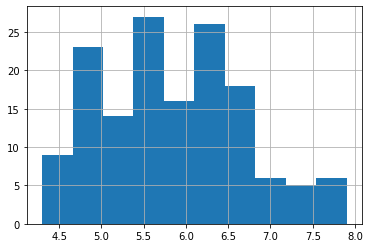

In [10]:
# Plotting histogram for each column/attribute

df['Sepal.Length'].hist()

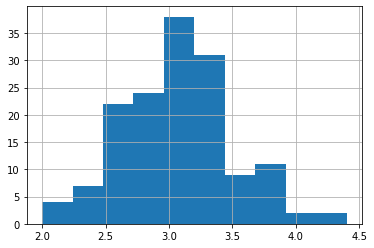

In [12]:
df['Sepal.Width'].hist()

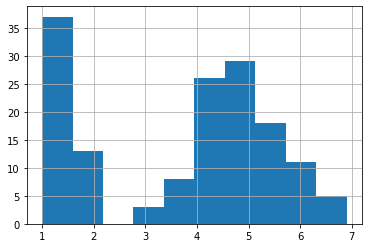

In [13]:
df['Petal.Length'].hist()

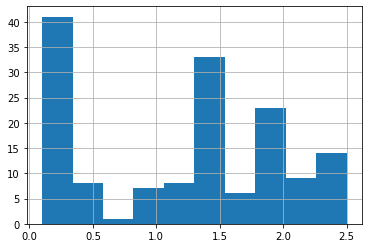

In [14]:
df['Petal.Width'].hist()

In [30]:
# Plotting scatterplots

colors = ['gray', 'lightcoral', 'lightsteelblue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

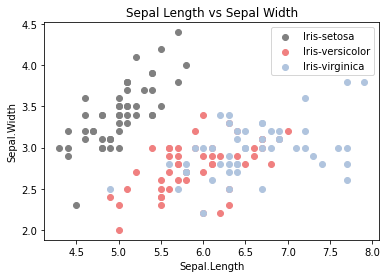

In [32]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal.Length'], x['Sepal.Width'], color=colors[i], label=species[i])
    
plt.xlabel("Sepal.Length")
plt.ylabel("Sepal.Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.show()

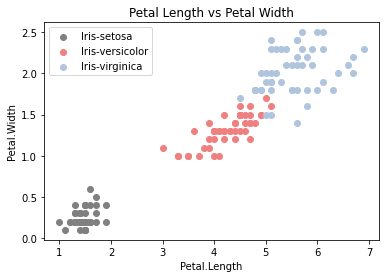

In [33]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal.Length'], x['Petal.Width'], color=colors[i], label=species[i])
    
plt.xlabel("Petal.Length")
plt.ylabel("Petal.Width")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

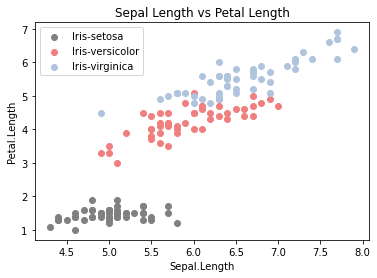

In [34]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal.Length'], x['Petal.Length'], color=colors[i], label=species[i])
    
plt.xlabel("Sepal.Length")
plt.ylabel("Petal.Length")
plt.title("Sepal Length vs Petal Length")
plt.legend()
plt.show()

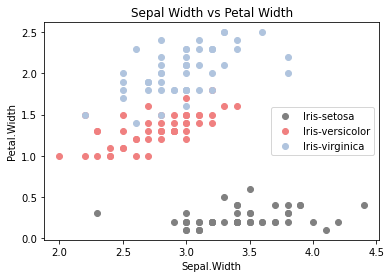

In [35]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal.Width'], x['Petal.Width'], color=colors[i], label=species[i])
    
plt.xlabel("Sepal.Width")
plt.ylabel("Petal.Width")
plt.title("Sepal Width vs Petal Width")
plt.legend()
plt.show()

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [36]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.109369,0.871754,0.817954
Sepal.Width,-0.109369,1.000000,-0.420516,-0.356544
Petal.Length,0.871754,-0.420516,1.000000,0.962757
Petal.Width,0.817954,-0.356544,0.962757,1.000000


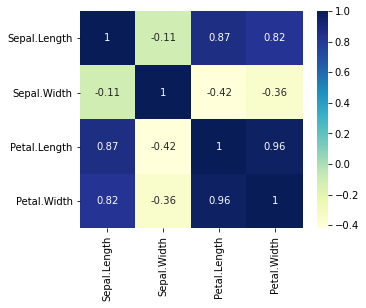

In [40]:
# We can also plot heatmap of correlation matrix using seaborn

corr = df.corr()
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")

# If any two columns have high correlation, we can drop any one column
# This can be done in large dataset
# But here we have only 4 attributes, so we will not remove

### Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Training the Model

1. Separate the target variable (x and y)
2. split the data into training and testing (70:30)
3. train the model using training set
   - as classification is a supervised learning techniue, we will use both the predictor and target variables
4. test the model accuracy using testing set

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## 1. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [56]:
# Predicting the values
model.predict(x_test)

array([2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0,
       2])

In [62]:
# Testing the model and evaluating its accuracy
print(f"Accuracy: {model.score(x_test, y_test) *100 :.2f}")

Accuracy: 95.56


## 2. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [64]:
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
# Predicting the values
model.predict(x_test)

array([2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0,
       2])

In [66]:
# Testing the model and evaluating its accuracy
print(f"Accuracy: {model.score(x_test, y_test) *100 :.2f}")

Accuracy: 97.78


## 3. Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
# Predicting the values
model.predict(x_test)

array([2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0,
       2])

In [70]:
# Testing the model and evaluating its accuracy
print(f"Accuracy: {model.score(x_test, y_test) *100 :.2f}")

Accuracy: 95.56


In [ ]:
# We can perform other classification algorithms also 
# like Random Forest, Naive Bayes, SVM etc.